### Activity
(Tuesday)

Linear Regression
X-y split (y is the target variable, in this case, "total claim amount")
Train-test split.
Standardize the data (after the data split!).
Apply linear regression.
Model Interpretation.


(Wednesday)
Model Validation
Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.


Model Iteration (Wednesday and Thursday)
Rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).
(Optional) Rerun the model after removing the outliers and compare the results using the R2.

In [1]:
#Importing libraries and data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split

file_path = '/Users/jameskenny/Documents/GitHub/Ironhack_Labs/Week 4/marketing_customer_analysis_clean (1).csv'
df = pd.read_csv(file_path)


In [2]:
numericals_df = df.select_dtypes(include='number')

In [3]:
#correlation
corr_matrix = numericals_df.corr()

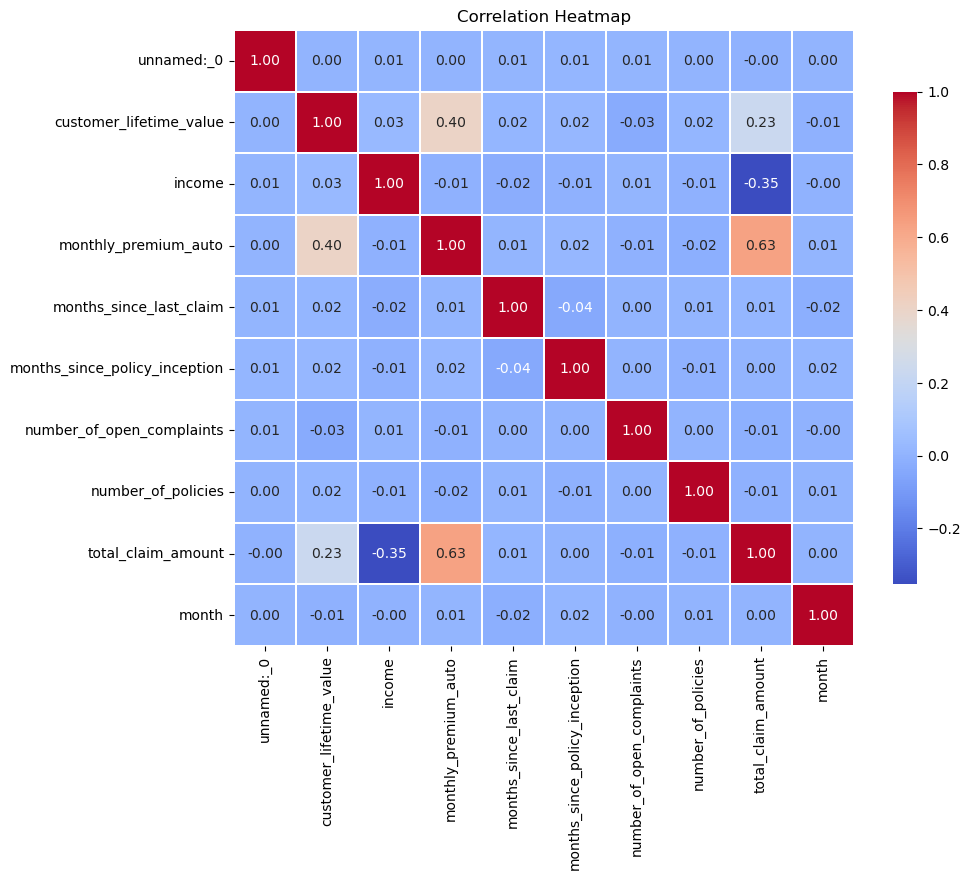

In [4]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')  
plt.show()


In [5]:
#correlations with "total_claim_amount"
#monthly_premium_auto = 0.63
#income = -0.35
#customer_lifetime_value = 0.23

In [6]:
numericals_df.columns

Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount', 'month'],
      dtype='object')

In [7]:
#define X and Y
X = df[["monthly_premium_auto", "income", "customer_lifetime_value",
        'months_since_last_claim','months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies']]
y = df[["total_claim_amount"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [8]:
#Linear regression
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [9]:
#Coefficients/slopes
model.coef_

array([[ 5.39059783e+00, -3.29323667e-03, -6.20205233e-04,
         1.82364268e-01, -1.78516307e-01, -4.89814367e-01,
         2.96693102e-01]])

In [10]:
#Intercept
model.intercept_

array([65.0705058])

In [11]:
#predict total_claim_amount for random sample
random_sample = X_test.sample()

In [12]:
random_sample

,monthly_premium_auto,income,customer_lifetime_value,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6636,64,0,2357.503128,25.0,80,0.0,1


In [13]:
model.predict(random_sample)

array([[399.18112658]])

In [14]:
#Predictions for test set

In [15]:
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,124.045840
1,349.844347
2,416.846234
3,434.942836
4,156.641279
...,...
2723,587.636597
2724,305.159787
2725,200.068980
2726,454.076175


In [16]:
y_test = y_test.reset_index(drop=True)
y_test

,total_claim_amount
0,475.423848
1,350.400000
2,482.400000
3,673.342650
4,302.400000
...,...
2723,460.266881
2724,405.883346
2725,41.182611
2726,364.800000


In [17]:
residuals_df = pd.concat([y_test,y_pred], axis = 1)

In [18]:
residuals_df

,total_claim_amount,0
0,475.423848,124.045840
1,350.400000,349.844347
2,482.400000,416.846234
3,673.342650,434.942836
4,302.400000,156.641279
...,...,...
2723,460.266881,587.636597
2724,405.883346,305.159787
2725,41.182611,200.068980
2726,364.800000,454.076175


In [19]:
residuals_df = residuals_df.rename(columns = {"total_claim_amount":"y_test", 0:"y_pred"})
residuals_df

,y_test,y_pred
0,475.423848,124.045840
1,350.400000,349.844347
2,482.400000,416.846234
3,673.342650,434.942836
4,302.400000,156.641279
...,...,...
2723,460.266881,587.636597
2724,405.883346,305.159787
2725,41.182611,200.068980
2726,364.800000,454.076175


In [20]:
residuals_df["residual"] = residuals_df["y_test"] - residuals_df["y_pred"]

In [21]:
residuals_df.head()

,y_test,y_pred,residual
0,475.423848,124.045840,351.378008
1,350.400000,349.844347,0.555653
2,482.400000,416.846234,65.553766
3,673.342650,434.942836,238.399814
4,302.400000,156.641279,145.758721


In [22]:
#Calculating metrics

In [23]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [24]:
mean_error = residuals_df["residual"].mean()
mean_error

4.603275399339514

In [25]:
mae_n = mae(y_test,y_pred)
mae_n

146.008926095887

In [26]:
mse_n = mse(y_test,y_pred)
mse_n

40493.39354684811

In [27]:
rmse_n = mse(y_test,y_pred, squared = False)
rmse_n

201.22970344073985

-------------------------------------------------------------------------------------------------------------------
### Standard Scaler

In [28]:
#Standard scaler
standard_scaler = StandardScaler()
#Standardizing X_train
standard_scaler.fit(X_train)
X_train_s = pd.DataFrame(standard_scaler.transform(X_train))
#Standardizing X_test *** ensuring to use same scaler from X_train
X_test_s = pd.DataFrame(standard_scaler.transform(X_test))


In [29]:
#Linear regression with standardized X_train
lm_s = LinearRegression()
model_s = lm_s.fit(X_train_s, y_train)



In [30]:
#Coefficients/slopes
print(model.coef_) #before standardizing
print(model_s.coef_) #after standardizing

[[ 5.39059783e+00 -3.29323667e-03 -6.20205233e-04  1.82364268e-01
  -1.78516307e-01 -4.89814367e-01  2.96693102e-01]]
[[ 187.89694865 -100.006139     -4.34349325    1.77356435   -4.99261861
    -0.4307874     0.70921673]]


In [31]:
#Intercept
print(model.intercept_) #before standardizing
print(model_s.intercept_) #after standardizing

[65.0705058]
[434.60833836]


In [32]:
#Predictions for test set

In [33]:
y_pred_s = model_s.predict(X_test_s)
y_pred_s = pd.DataFrame(y_pred_s)


In [34]:
residuals_df_s = pd.concat([y_test,y_pred_s], axis = 1)

In [35]:
residuals_df_s = residuals_df_s.rename(columns = {"total_claim_amount":"y_test", 0:"y_pred_s"})


In [36]:
residuals_df_s["residual"] = residuals_df_s["y_test"] - residuals_df_s["y_pred_s"]


In [37]:
residuals_df_s

,y_test,y_pred_s,residual
0,475.423848,124.045840,351.378008
1,350.400000,349.844347,0.555653
2,482.400000,416.846234,65.553766
3,673.342650,434.942836,238.399814
4,302.400000,156.641279,145.758721
...,...,...,...
2723,460.266881,587.636597,-127.369716
2724,405.883346,305.159787,100.723559
2725,41.182611,200.068980,-158.886369
2726,364.800000,454.076175,-89.276175


In [38]:
#Calculating metrics
mean_error_s = residuals_df_s["residual"].mean()
mean_error_s


4.603275399339596

In [39]:
mae_s = mae(y_test,y_pred_s)
print(mae_n)
print(mae_s)

146.008926095887
146.0089260958871


In [40]:
mse_s = mse(y_test,y_pred_s)
print(mse_n)
print(mse_s)

40493.39354684811
40493.39354684809


In [41]:
rmse_s = mse(y_test,y_pred_s, squared = False)
print(rmse_n)
print(rmse_s)

201.22970344073985
201.22970344073983


---
### Power Transform

In [42]:
#Power Transform
power_transformer = PowerTransformer(method='yeo-johnson')
power_transformer.fit(X_train)
X_train_p = pd.DataFrame(power_transformer.transform(X_train))
X_test_p= pd.DataFrame(power_transformer.transform(X_test))

In [43]:
#also should apply power transform to y_train
power_transformer_y = PowerTransformer()
power_transformer_y.fit(y_train)
y_train_p = pd.DataFrame(power_transformer_y.transform(y_train))


In [44]:
#Linear regression with standardized X_train
lm_p = LinearRegression()
model_p = lm_p.fit(X_train_p, y_train_p)



In [45]:
#Coefficients/slopes
print(model.coef_) #before standardizing
print(model_s.coef_) #after standardizing
print(model_p.coef_) #after standardizing

[[ 5.39059783e+00 -3.29323667e-03 -6.20205233e-04  1.82364268e-01
  -1.78516307e-01 -4.89814367e-01  2.96693102e-01]]
[[ 187.89694865 -100.006139     -4.34349325    1.77356435   -4.99261861
    -0.4307874     0.70921673]]
[[ 0.47056173 -0.36820284  0.0255659   0.00385146 -0.01832117 -0.00721465
  -0.02040882]]


In [46]:
#Intercept
print(model.intercept_) #before standardizing
print(model_s.intercept_) #after standardizing
print(model_p.intercept_) #after standardizing

[65.0705058]
[434.60833836]
[-2.0226631e-15]


In [47]:
#Predictions for test set

In [48]:
y_pred_p = model_p.predict(X_test_p)
y_pred_p = power_transformer_y.inverse_transform(y_pred_p) # Inverse transform the predictions to original scale
y_pred_p = pd.DataFrame(y_pred_p)
y_pred_p


/Users/jameskenny/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


,0
0,213.150428
1,284.158455
2,405.048717
3,427.206676
4,182.221472
...,...
2723,488.388921
2724,245.751783
2725,274.796771
2726,502.181184


In [49]:
residuals_df_p = pd.concat([y_test,y_pred_p], axis = 1)

In [50]:
residuals_df_p = residuals_df_p.rename(columns = {"total_claim_amount":"y_test", 0:"y_pred_p"})
residuals_df_p

,y_test,y_pred_p
0,475.423848,213.150428
1,350.400000,284.158455
2,482.400000,405.048717
3,673.342650,427.206676
4,302.400000,182.221472
...,...,...
2723,460.266881,488.388921
2724,405.883346,245.751783
2725,41.182611,274.796771
2726,364.800000,502.181184


In [51]:
residuals_df_p["residual"] = residuals_df_p["y_test"] - residuals_df_p["y_pred_p"]
residuals_df_p

,y_test,y_pred_p,residual
0,475.423848,213.150428,262.273420
1,350.400000,284.158455,66.241545
2,482.400000,405.048717,77.351283
3,673.342650,427.206676,246.135974
4,302.400000,182.221472,120.178528
...,...,...,...
2723,460.266881,488.388921,-28.122040
2724,405.883346,245.751783,160.131563
2725,41.182611,274.796771,-233.614160
2726,364.800000,502.181184,-137.381184


In [52]:
#Calculating metrics
mean_error_p = residuals_df_p["residual"].mean()
print(mean_error)
print(mean_error_s)
print(mean_error_p)


4.603275399339514
4.603275399339596
33.82162713474276


In [53]:
mae_p = mae(y_test,y_pred_p)
print(mae_n)
print(mae_s)
print(mae_p)


146.008926095887
146.0089260958871
156.06121747566962


In [54]:
mse_p = mse(y_test,y_pred_p)
print(mse_n)
print(mse_s)
print(mse_p)


40493.39354684811
40493.39354684809
44769.5118948707


In [55]:
rmse_p = mse(y_test,y_pred_p, squared = False)
print(rmse_n)
print(rmse_s)
print(rmse_p)

201.22970344073985
201.22970344073983
211.58807124899718


In [56]:
#joining dfs to show comparison of results using different scalers/transforms
comparison_df = pd.concat([residuals_df,residuals_df_s,residuals_df_p], axis = 1)

In [57]:
comparison_df.head()

,y_test,y_pred,residual,y_test,y_pred_s,residual,y_test,y_pred_p,residual
0,475.423848,124.045840,351.378008,475.423848,124.045840,351.378008,475.423848,213.150428,262.273420
1,350.400000,349.844347,0.555653,350.400000,349.844347,0.555653,350.400000,284.158455,66.241545
2,482.400000,416.846234,65.553766,482.400000,416.846234,65.553766,482.400000,405.048717,77.351283
3,673.342650,434.942836,238.399814,673.342650,434.942836,238.399814,673.342650,427.206676,246.135974
4,302.400000,156.641279,145.758721,302.400000,156.641279,145.758721,302.400000,182.221472,120.178528


In [58]:
#Printing results of error comparison between different scalers/transforms
print(f'Mean error:\n  no scaler/transform:  {round(mean_error,2)}\n  standard scaler:      {round(mean_error_s,2)}\n  power transform:      {round(mean_error_p,2)}')
print(f'Mean absolut error:\n  no scaler/transform:  {round(mae_n,2)}\n  standard scaler:      {round(mae_s,2)}\n  power transform:      {round(mae_p,2)}')
print(f'Mean squared error:\n  no scaler/transform:  {round(mse_n,2)}\n  standard scaler:      {round(mse_s,2)}\n  power transform:      {round(mse_p,2)}')
print(f'Root mean squared error:\n  no scaler/transform:  {round(rmse_n,2)}\n  standard scaler:      {round(rmse_s,2)}\n  power transform:      {round(rmse_p,2)}')


Mean error:
  no scaler/transform:  4.6
  standard scaler:      4.6
  power transform:      33.82
Mean absolut error:
  no scaler/transform:  146.01
  standard scaler:      146.01
  power transform:      156.06
Mean squared error:
  no scaler/transform:  40493.39
  standard scaler:      40493.39
  power transform:      44769.51
Root mean squared error:
  no scaler/transform:  201.23
  standard scaler:      201.23
  power transform:      211.59


==================================================================================================================

# Wednesday

## Model Validation

##### Lab instructions :
1. Compute R2 for the first model iteration + feature importance plot
2. Run the 2nd iteration of the model, adding the categorical data

### Computing R2 values for test Data

#### R^2 for test data

In [59]:
#Calculating R^2
from sklearn.metrics import r2_score

r2_n = r2_score(y_test, y_pred)
r2_s = r2_score(y_test, y_pred_s)
r2_p = r2_score(y_test, y_pred_p)


#### Adjusted R^2 for test data

In [60]:
#Calculating adjusted R^2
num_obs = X_test.shape[0]
num_feat = X_test.shape[1]

adjusted_r2_n = 1 - (1-r2_n) * (num_obs-1) / (num_obs-num_feat-1)
adjusted_r2_s = 1 - (1-r2_s) * (num_obs-1) / (num_obs-num_feat-1)
adjusted_r2_p = 1 - (1-r2_p) * (num_obs-1) / (num_obs-num_feat-1)


In [61]:
#Printing result 
print(f'R^2:\n  no scaler/transform:  {round(r2_n,2)}\n  standard scaler:      {round(r2_s,2)}\n  power transform:      {round(r2_p,2)}')
print(f'Adjusted_R^2:\n  no scaler/transform:  {round(adjusted_r2_n,2)}\n  standard scaler:      {round(adjusted_r2_s,2)}\n  power transform:      {round(adjusted_r2_p,2)}')


R^2:
  no scaler/transform:  0.51
  standard scaler:      0.51
  power transform:      0.46
Adjusted_R^2:
  no scaler/transform:  0.51
  standard scaler:      0.51
  power transform:      0.46


### Computing R2 values for training data

#### Running model on training data

In [62]:
y_train_pred_n = pd.DataFrame(model.predict(X_train))
y_train_pred_s = pd.DataFrame(model_s.predict(X_train_s))
                              
y_train_pred_p = model_p.predict(X_train_p)
y_train_pred_p = pd.DataFrame(power_transformer_y.inverse_transform(y_pred_p)) # inversing y



/Users/jameskenny/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


#### R^2 for training data

In [63]:
r2_train_n = r2_score(y_train, y_train_pred_n)
r2_train_s = r2_score(y_train, y_train_pred_s)


In [64]:
#Printing result 
print(f'R^2 for training data:\n  no scaler/transform:  {round(r2_train_n,2)}\n  standard scaler:      {round(r2_train_s,2)}\n ')


R^2 for training data:
  no scaler/transform:  0.52
  standard scaler:      0.52
 


### Feature Importance

In [65]:
feature_names_s = list(X_train.columns)

In [66]:
coefficients_s = model_s.coef_

In [67]:
coefficients_s = [i for i in coefficients_s[0]]

In [68]:
fi_dict = {"name":feature_names_s,"coeff":coefficients_s}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,monthly_premium_auto,187.896949
1,income,-100.006139
2,customer_lifetime_value,-4.343493
3,months_since_last_claim,1.773564
4,months_since_policy_inception,-4.992619
5,number_of_open_complaints,-0.430787
6,number_of_policies,0.709217


<Axes: xlabel='coeff', ylabel='name'>

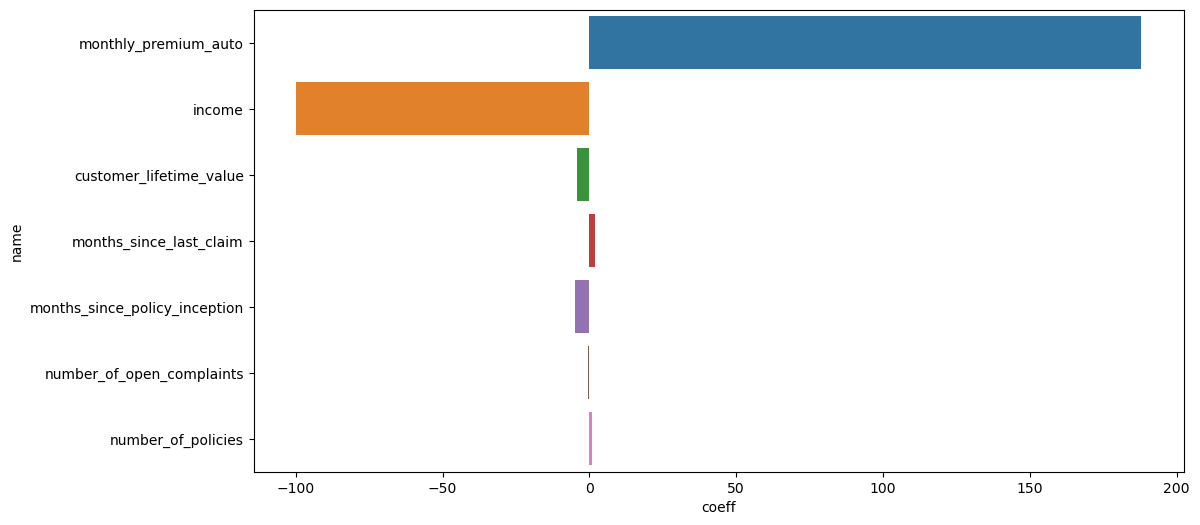

In [69]:
#Feature importance plot for standardized data
plt.figure(figsize=(12, 6))

sns.barplot(y="name", x="coeff", data=fi_df)

In [70]:
#Feature importance plot for non standardized data
feature_names_n = list(X_train.columns)

In [71]:
coefficients_n = model.coef_

In [72]:
coefficients_n = [i for i in coefficients_n[0]]

In [73]:
fi_dict_n = {"name":feature_names_n,"coeff":coefficients_n}
fi_df_n = pd.DataFrame(fi_dict_n)
fi_df_n

,name,coeff
0,monthly_premium_auto,5.390598
1,income,-0.003293
2,customer_lifetime_value,-0.000620
3,months_since_last_claim,0.182364
4,months_since_policy_inception,-0.178516
5,number_of_open_complaints,-0.489814
6,number_of_policies,0.296693


<Axes: xlabel='coeff', ylabel='name'>

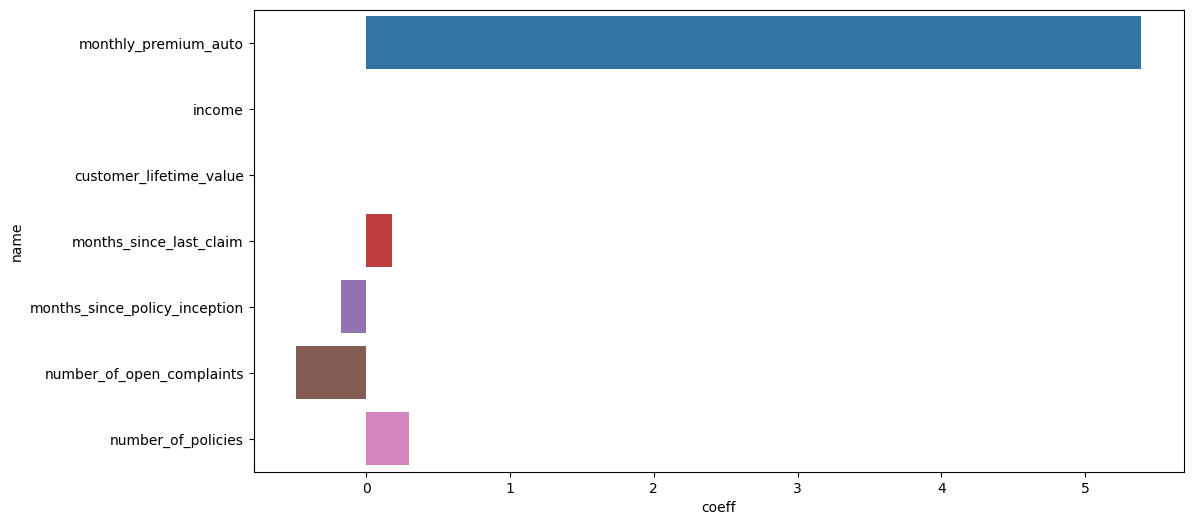

In [74]:
plt.figure(figsize=(12, 6))

sns.barplot(y="name", x="coeff", data=fi_df_n)

### Adding encoded categorical variables

In [75]:
file_path = '/Users/jameskenny/Documents/GitHub/Ironhack_Labs/Week 4/marketing_customer_analysis_clean (1).csv'
df = pd.read_csv(file_path)


categoricals_df = df.select_dtypes(include='object')

In [76]:
nominals_df = categoricals_df[['state', 'response', 'employmentstatus','gender','location_code','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class','vehicle_type']]
ordinals_df = categoricals_df[['coverage', 'education', 'vehicle_size']]

In [77]:
#onehot for nominal variables
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(nominals_df)
onehot_encoded = encoder.transform(nominals_df)
columns = encoder.get_feature_names_out(['state', 'response', 'employmentstatus','gender','location_code','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class','vehicle_type'])
onehot_encoded_w_n = pd.DataFrame(onehot_encoded, columns=columns)

/Users/jameskenny/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
from sklearn.preprocessing import OrdinalEncoder

In [79]:
encoder_ord = OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium'],
                                         ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'],
                                         ['Small', 'Medsize', 'Large']])


In [80]:
encoder_ord.fit(ordinals_df)
ordinals_encoded = encoder_ord.transform(ordinals_df[['coverage', 'education', 'vehicle_size']])

columns_ord = encoder_ord.get_feature_names_out(['coverage', 'education', 'vehicle_size'])
ordinals_encoded_w_n = pd.DataFrame(ordinals_encoded, columns=columns_ord, index=ordinals_df.index)

#joining nominals and ordinals
categorical_encoded = pd.concat([onehot_encoded_w_n,ordinals_encoded_w_n], axis = 1)
categorical_encoded

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,coverage,education,vehicle_size
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
10906,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
10907,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
10908,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0


In [81]:
final_df = pd.concat([numericals_df,ordinals_encoded_w_n,onehot_encoded_w_n], axis=1)
final_df.columns

Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount', 'month', 'coverage',
       'education', 'vehicle_size', 'state_Arizona', 'state_California',
       'state_Nevada', 'state_Oregon', 'state_Washington', 'response_No',
       'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy

### Rerunning model for full dataset with numericals and encoded categoricals

#### Splitting training data and test data

In [82]:
#define X and Y
X_f = final_df.drop(["total_claim_amount"], axis=1)

y_f = final_df[["total_claim_amount"]]

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f,y_f, random_state = 42)

#### Stadardizing data

In [83]:
#Standard scaler
standard_scaler_f = StandardScaler()
#Standardizing X_train_f
standard_scaler_f.fit(X_train_f)
X_train_f_s = pd.DataFrame(standard_scaler_f.transform(X_train_f))
#Standardizing X_test *** ensuring to use same scaler from X_train
X_test_f_s = pd.DataFrame(standard_scaler_f.transform(X_test_f))


In [84]:
#Power transformer to account for skew in target value
pt_f = PowerTransformer()
pt_f.fit(y_train_f)
y_train_f_p = pd.DataFrame(pt_f.transform(y_train_f))
y_test_f_p = pd.DataFrame(pt_f.transform(y_test_f))


#### Linear regression

In [85]:
#Linear regression with standardized X_train
lm_f_s = LinearRegression()
model_f_s = lm_f_s.fit(X_train_f_s, y_train_f_p)



In [86]:
#Coefficients/slopes
print(model_f_s.coef_)

[[ 4.55718435e-03  2.34904937e-03 -1.68611054e-02  4.92986772e-01
   1.33608858e-02 -2.75346795e-03 -4.03924269e-03  6.33741297e-03
   4.60360558e-04  7.59956599e-03 -9.37566407e-03 -6.41235008e-03
  -1.55994950e+11 -1.98628324e+11 -1.17249503e+11 -1.81656009e+11
  -1.13587544e+11  3.05403419e+12  3.05403419e+12  9.34591356e+11
   2.14463398e+12  9.44934399e+11  7.50154243e+11  1.92624982e+12
  -2.24526325e+12 -2.24526325e+12  1.73852645e+12  2.12744496e+12
   1.68310198e+12 -1.14935973e+12 -1.58272965e+12 -1.42181687e+12
  -5.56079785e+12 -8.41648957e+12 -3.53349814e+12 -1.58270475e+12
  -1.97213941e+12 -2.58100468e+12 -8.05985184e+11 -9.90531205e+11
  -1.14021932e+12 -3.12337181e+11 -4.73040726e+11 -4.24225976e+11
  -2.69219403e+12 -2.55001527e+12 -2.00712251e+12 -1.70144517e+12
  -1.66132603e+12 -1.53190841e+12 -1.36609582e+12 -1.21639659e+12
   1.86643465e+12  4.85022011e+11  5.19448615e+11  1.44901985e+12
   8.26257255e+11  1.48723261e+12  0.00000000e+00]]


In [87]:
#Intercept
print(model_f_s.intercept_) #after standardizing

[7.97428404e-05]


#### Predictions for test data for full data set

In [88]:
y_pred_f_s = pd.DataFrame(model_f_s.predict(X_test_f_s))
y_pred_f_s = pd.DataFrame(pt_f.inverse_transform(y_pred_f_s)) # inversing y
y_pred_f_s = y_pred_f_s.rename(columns = {0:"y_pred_f_s"})
y_pred_f_s

/Users/jameskenny/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


,y_pred_f_s
0,377.570386
1,412.964176
2,497.753200
3,576.724371
4,331.833724
...,...
2723,526.899505
2724,394.967089
2725,67.841529
2726,484.213704


In [89]:
y_test_f = y_test_f.reset_index(drop=True)
y_test_f = y_test_f.rename(columns = {"total_claim_amount":"y_test_f"})

In [90]:
residuals_df_f_s = pd.concat([y_test_f,y_pred_f_s], axis = 1)
residuals_df_f_s

,y_test_f,y_pred_f_s
0,475.423848,377.570386
1,350.400000,412.964176
2,482.400000,497.753200
3,673.342650,576.724371
4,302.400000,331.833724
...,...,...
2723,460.266881,526.899505
2724,405.883346,394.967089
2725,41.182611,67.841529
2726,364.800000,484.213704


In [91]:
residuals_df_f_s["residual_f_s"] = residuals_df_f_s["y_test_f"] - residuals_df_f_s["y_pred_f_s"]


In [92]:
residuals_df_f_s

,y_test_f,y_pred_f_s,residual_f_s
0,475.423848,377.570386,97.853462
1,350.400000,412.964176,-62.564176
2,482.400000,497.753200,-15.353200
3,673.342650,576.724371,96.618279
4,302.400000,331.833724,-29.433724
...,...,...,...
2723,460.266881,526.899505,-66.632624
2724,405.883346,394.967089,10.916257
2725,41.182611,67.841529,-26.658918
2726,364.800000,484.213704,-119.413704


#### Calculating metrics

In [93]:
#Root mean squared error
rmse_f = mse(y_test_f,y_pred_f_s, squared = False)
print(rmse_f)

129.13511840293708


In [94]:
#R^2
r2_f = round(r2_score(y_test_f, y_pred_f_s),2)
print(r2_f)

0.8


### Computing R2 values for training data

#### Running model on training data

#### R^2 for training data

#### R^2 for training data

### Feature Importance

In [117]:
#getting feature names and coefficients
feature_names_f_s = list(X_train_f.columns)
coefficients_f_s = model_f_s.coef_
coefficients_f_s = [i for i in coefficients_f_s[0]]

#creating feature importance dataframe
fi_dict_f = {"name":feature_names_f_s,"coeff":coefficients_f_s}
fi_df_f = pd.DataFrame(fi_dict_f)
fi_df_f = fi_df_f.sort_values('coeff', ascending=False)

#Getting absolute values
fi_df_f_abs = fi_df_f['coeff'] = fi_df_f['coeff'].abs() 
#Sorting in descending order
fi_df_f_abs = fi_df_f.sort_values('coeff', ascending=False)

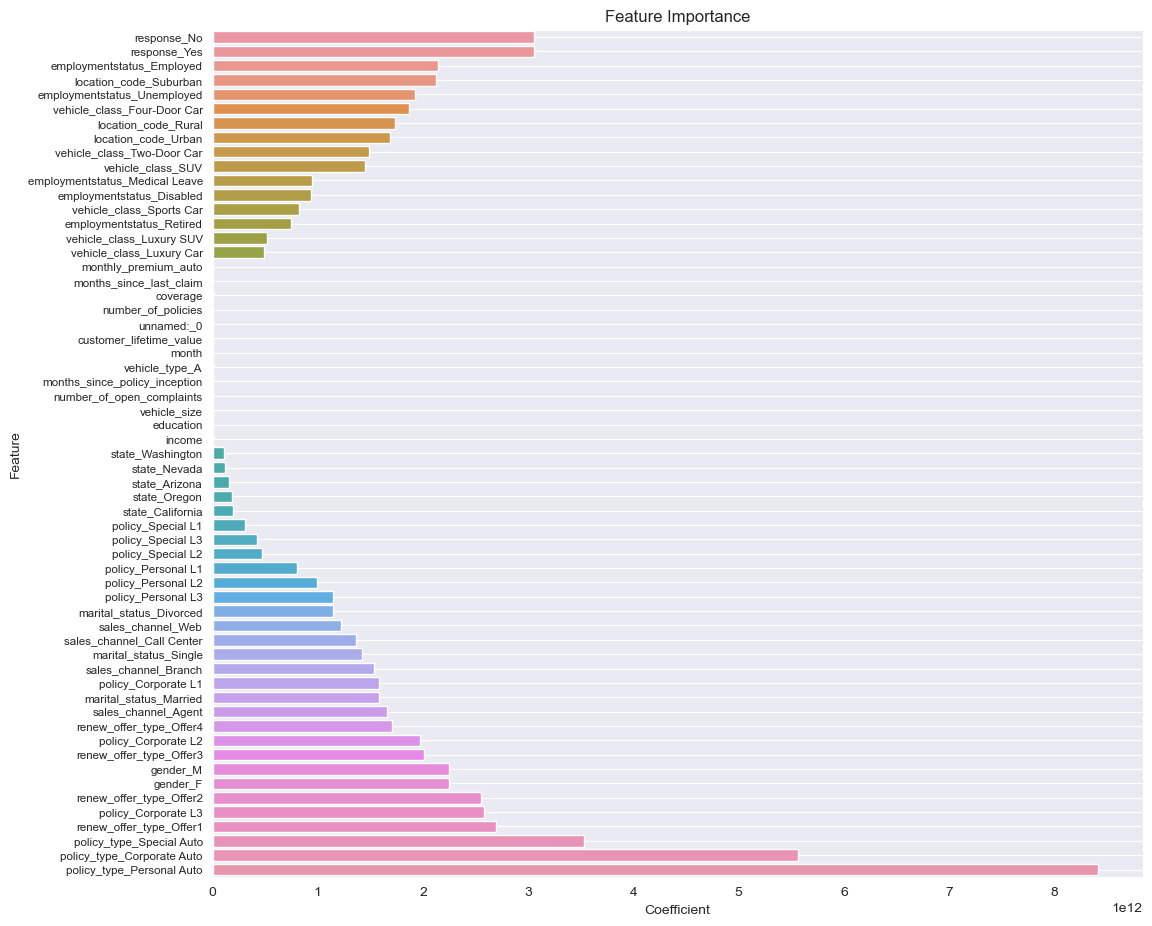

In [108]:
#Feature importance plot for standardized data
plt.figure(figsize=(12, 11))
sns.set_style("darkgrid")
sns.barplot(y="name", x="coeff", data=fi_df_f)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.grid()
plt.xticks()
plt.yticks(fontsize='small')
plt.xlim() and plt.ylim()
plt.show()

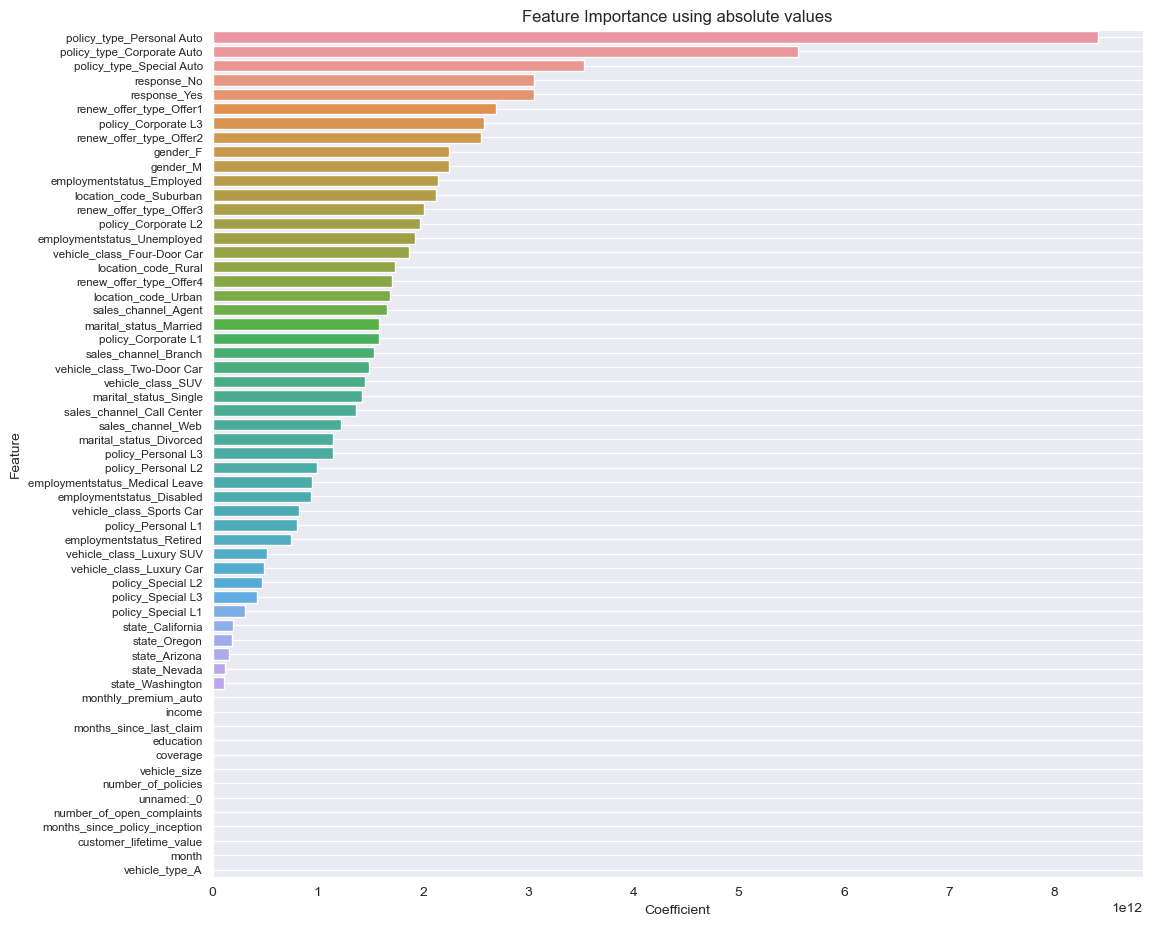

In [113]:
#Feature importance plot using absolute values
plt.figure(figsize=(12, 11))
sns.set_style("darkgrid")
sns.barplot(y="name", x="coeff", data=fi_df_f_abs)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance using absolute values")
plt.grid()
plt.xticks()
plt.yticks(fontsize='small')
plt.xlim() and plt.ylim()
plt.show()

### Attempts to improve model

In [99]:
#correlation
corr_matrix_f = final_df.corr()

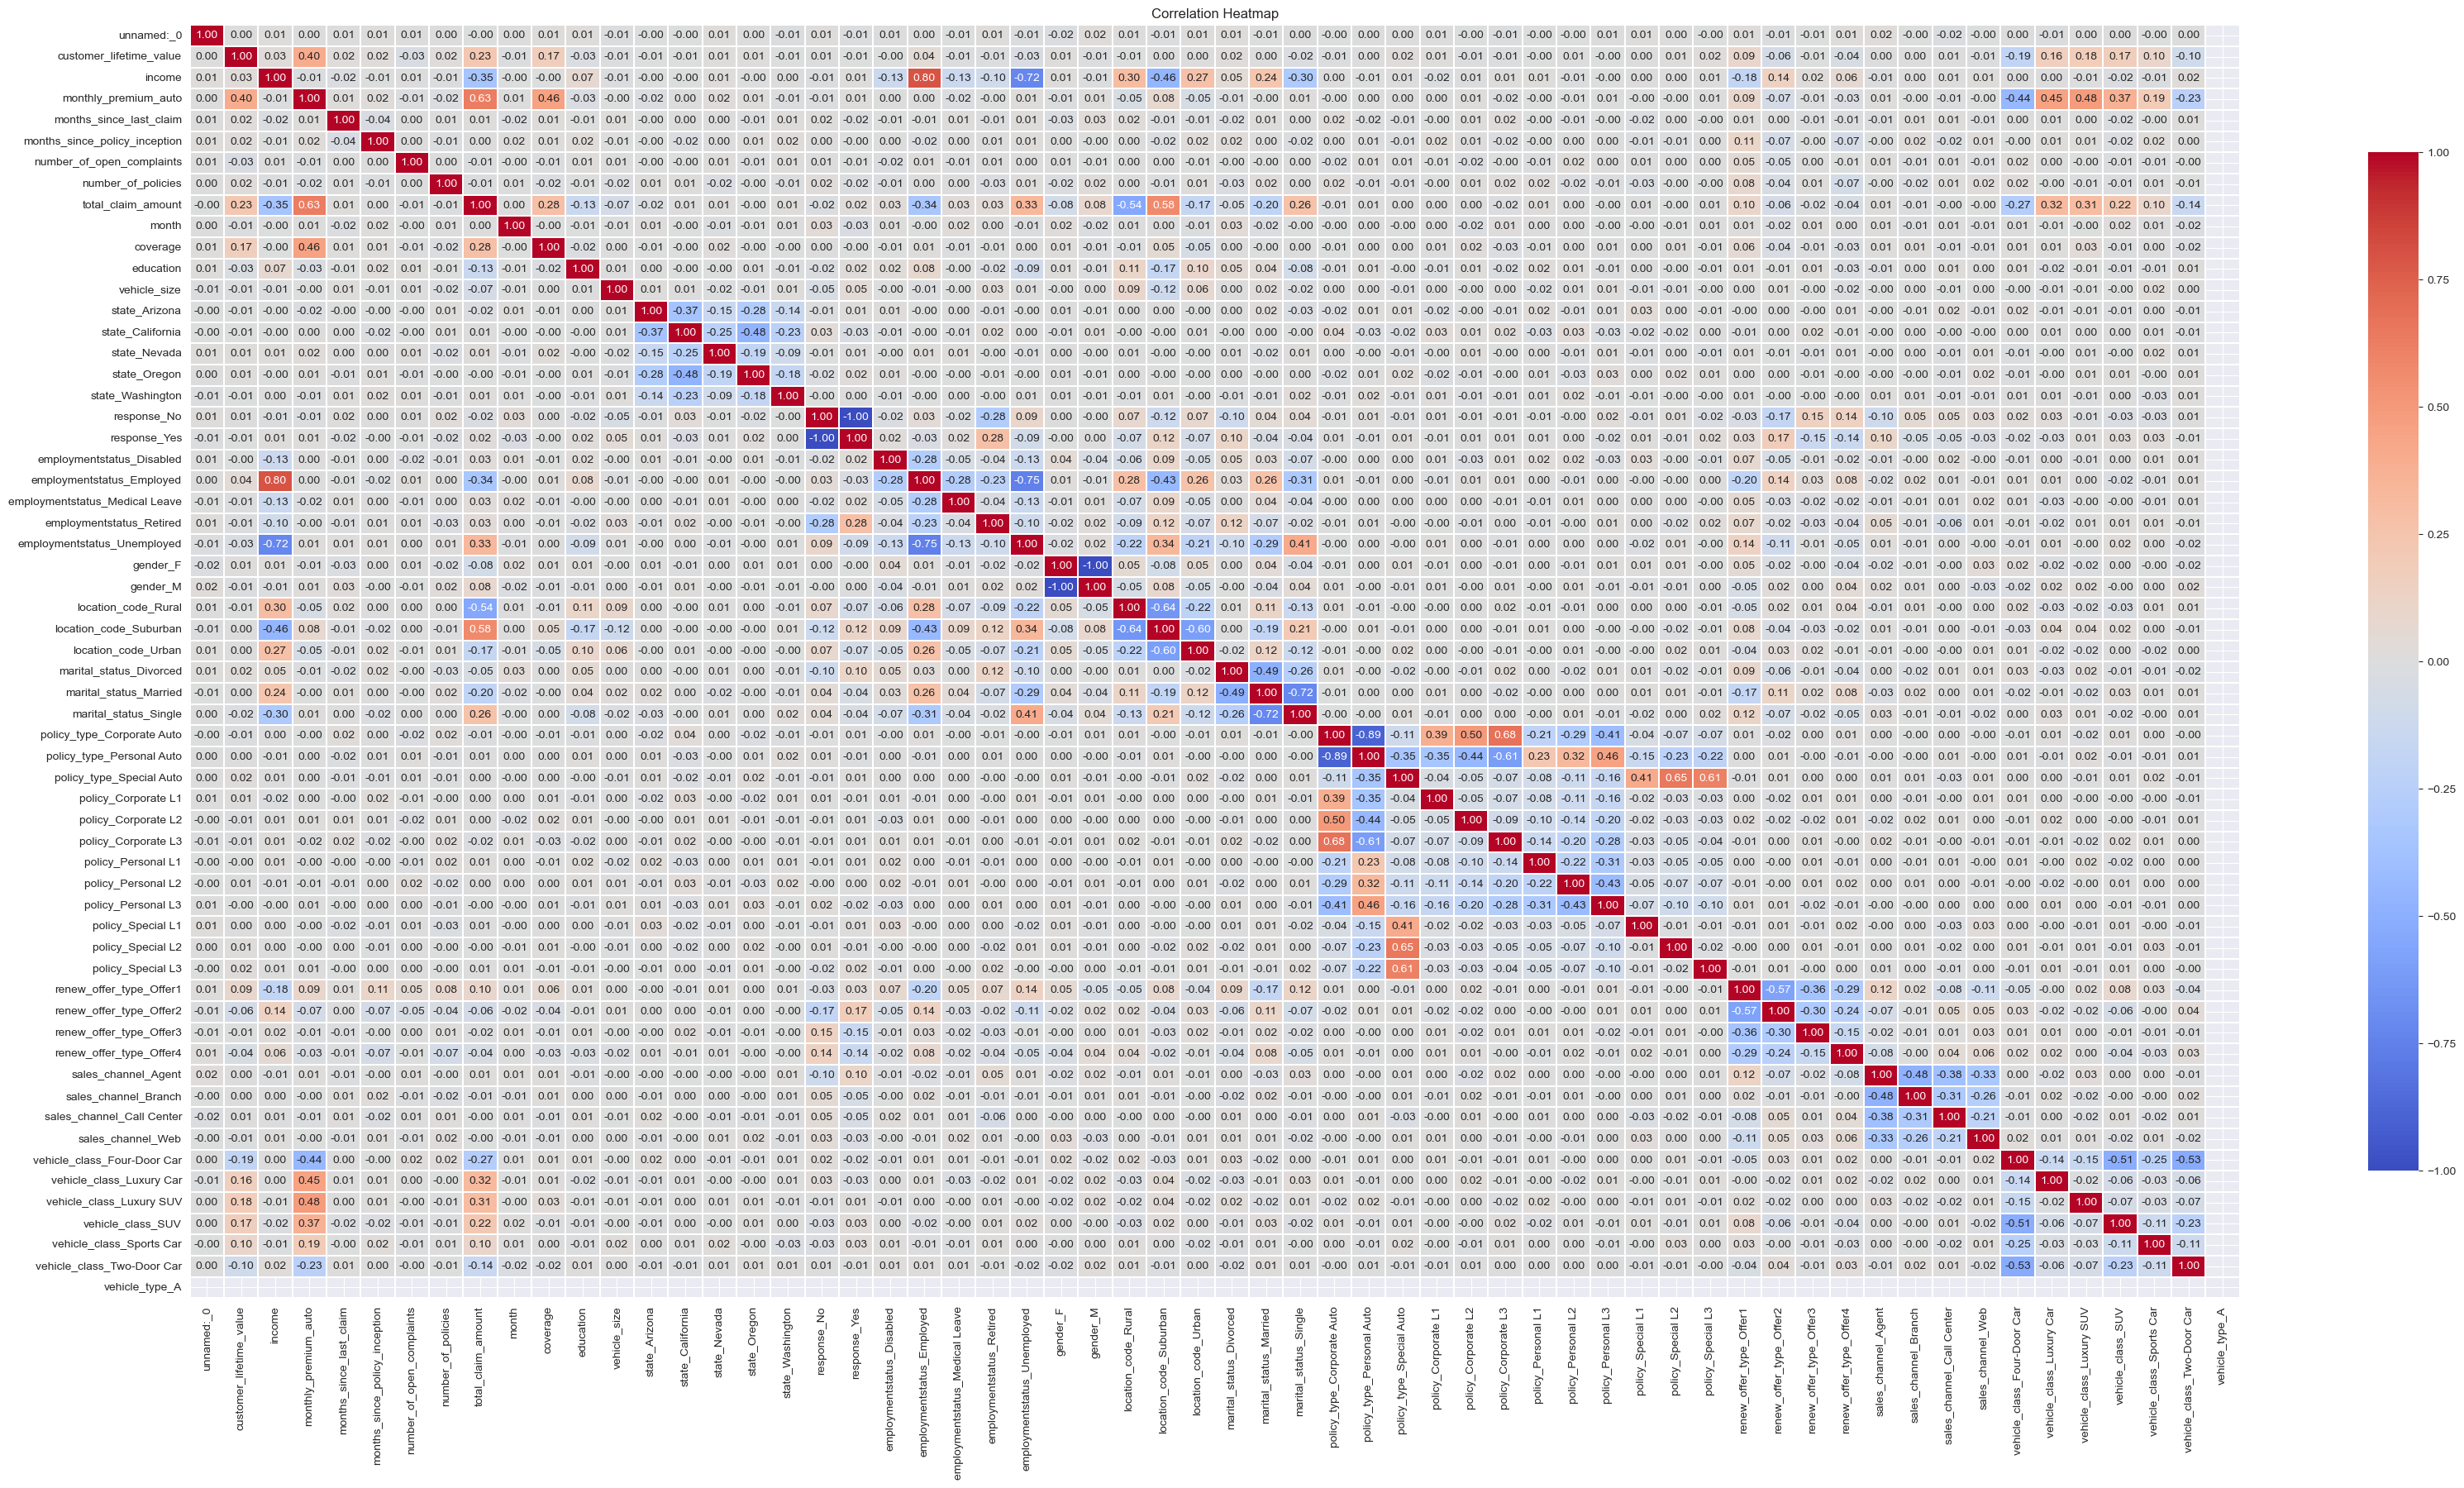

In [116]:
plt.figure(figsize=(40, 20))  # Optional: Adjust the figure size as needed
sns.heatmap(corr_matrix_f, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')  # Optional: Add a title to your heatmap
plt.show()
